### Importing the required libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Loading and understanding the dataset

In [2]:
df = pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.shape

(1259, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [6]:
# Check for null values
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

#### Handling null values

- The dataset has five columns with missing values - Parking, Bathroom, Furnishing, Type and Per_Sqft.
- Replacing null values in Per_Sqft column by dividing Price by Area.
- To find the missing values in Parking, Bathroom, Furnishing and Type, I will replace the missing values with the mode of them.

In [7]:
# Replacing missing values in Per_Sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'] = df['Parking'].fillna(df['Parking'].mode()[0])
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [8]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [9]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

Parking and Number of bathrooms, can't be in float so, converting them into integer

In [10]:
# Type casting
df['Parking'] = df['Parking'].astype('int64')
df['Bathroom'] = df['Bathroom'].astype('int64')

In [11]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


### Exploratory Data Analysis

In [12]:
# Stats summary of numerical data
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,1466.452724,2.796664,2.555203,1.911041,2.130670e+07,15051.968691
std,1568.055040,0.954425,1.041627,6.198110,2.560115e+07,19216.189577
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6584.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11333.333333
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,17647.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [13]:
# Stats summary of categorical data
df.describe(include='O')

,Furnishing,Locality,Status,Transaction,Type
count,1259,1259,1259,1259,1259
unique,3,365,2,2,2
top,Semi-Furnished,Lajpat Nagar 3,Ready_to_move,Resale,Builder_Floor
freq,713,34,1184,781,666


#### Feature Engineering

Since there are so many localities in the dataset, I have decided to take only top 10 localities and list the remaining localities as 'other' in the dataset. It will help in analysing the locality of the house in a better way.

In [14]:
def grp_local(locality):
    locality = locality.lower() 
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

In [15]:
# Apply grp_local function to Locality column
df['Locality'] = df['Locality'].apply(grp_local)

In [16]:
df['Locality'].value_counts()

Locality
Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [17]:
# Adding new area column in sq.yards for better understanding of area
df['Area_Yards'] = df['Area']/9

#### Data Visualization

Text(0.5, 1.0, 'Area in Yards')

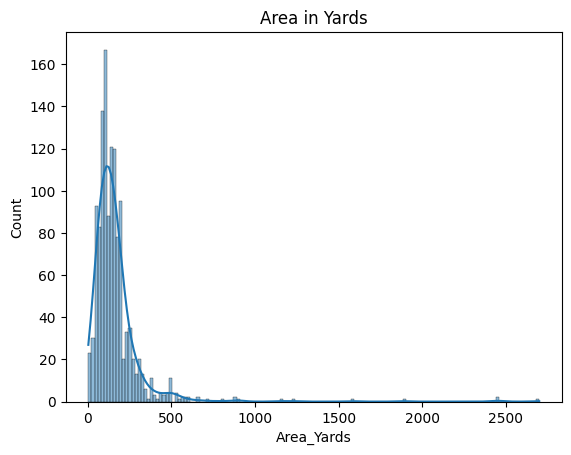

In [18]:
# Area of Houses
sns.histplot(x = df['Area_Yards'],kde = True)
plt.title('Area in Yards')

Most of the houses have area between 80 - 200 sq. yards. This means that most of the houses in delhi are small houses and there are few house having area near 300 sq yards. Whereas there are very few houses having area more than 400 sq yards. This representation helps us to know about availability of space in delhi.

Text(0.5, 1.0, 'BHK')

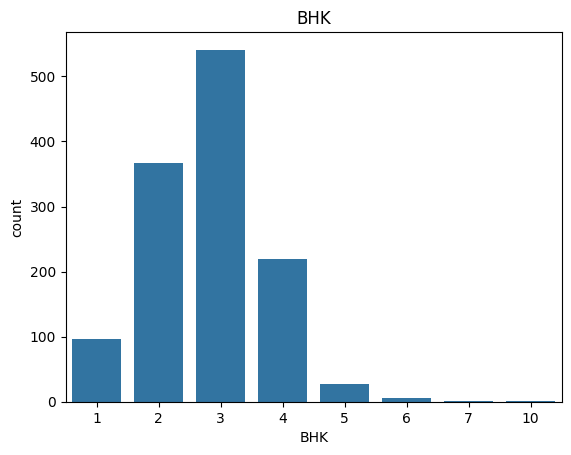

In [19]:
# BHK
sns.countplot(x=df['BHK'],data=df)
plt.title('BHK')

Most of houses are 3 BHK followed by 2, 4, 1 and 5 BHK houses.Houses with area near 200 yards can have maximum 3 bedrooms, for houses with area near 100 can have 2 bedrooms and 1 bedroom for houses with area less than 80 sq yards. Moreover whoses having area more than 300 are less in number so the count of 4BHK and 5BHK. Thus, there is a relation between the BHK and area of house, with this relation we can get a idea about the structure of houses.

Text(0.5, 1.0, 'Bathroom')

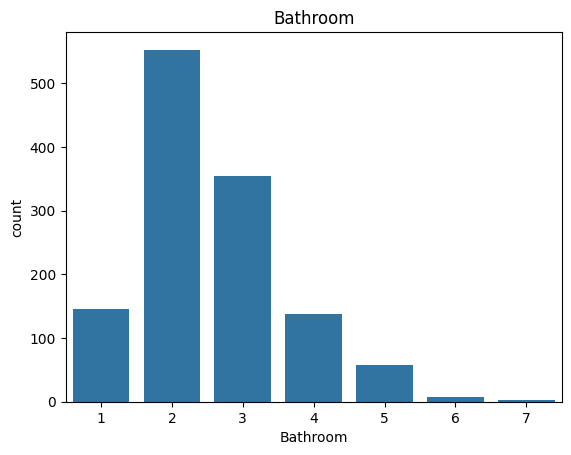

In [20]:
# Bathroom count
sns.countplot(x=df['Bathroom'],data=df)
plt.title('Bathroom')

Majority of the houses have 2 bathrooms which, is quite obvious. However there some houses having 3 or more than 3 bathrooms, which is means these houses are quite big and spacious to have 3 or more bathrooms. Smaller houses usually have 1 bathroom.

Text(0.5, 1.0, 'Furnishing')

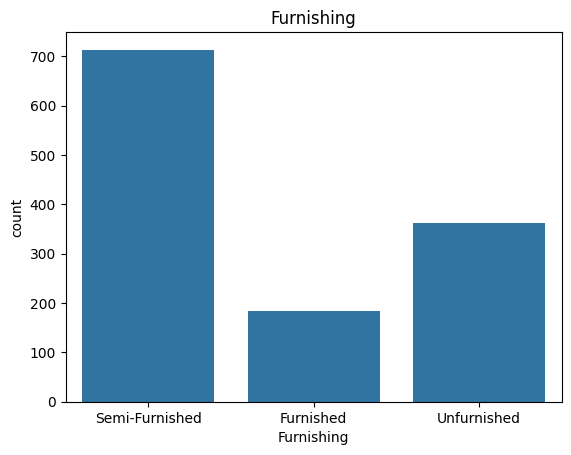

In [21]:
# Furnishing
sns.countplot(x=df['Furnishing'],data=df)
plt.title('Furnishing')

Delhi is very close captial of India, New Delhi and many people migrate from various regions of the country mostly for employment reasons to this region. As these people look for accomodations, the furnishing of the houses play a major role. People who are migrationg from huge distances cannot afford to move their furniture and other household items. Hence, they look for fully furnished houses. Similarly the people from neighbouring states might prefer semi-furnished houses, whereas Delhi locals who are moving to some other reason might prefer unfurnished houses. Hence, the furnishing of the house plays a major role in the price of the house. Hence, we have included this feature in our dataset

Text(0.5, 1.0, 'Locality')

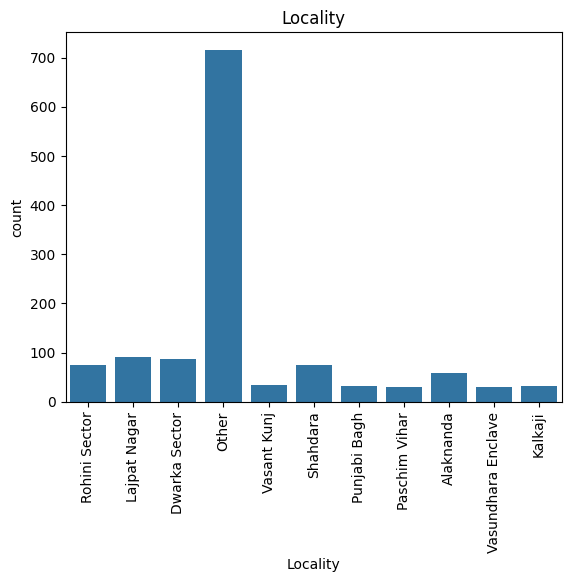

In [22]:
# Locality
sns.countplot(x=df['Locality'],data=df)
plt.xticks(rotation = 90)
plt.title('Locality')

After visualizing the locality on the graph, we can se that after the 'Other' category, the Dwarka Sector has highest number of houses followed by Lajpat Nagar and Rohini Sector.From this info, I assume that these localities are good to settle in Delhi.

Text(0.5, 1.0, 'Parking')

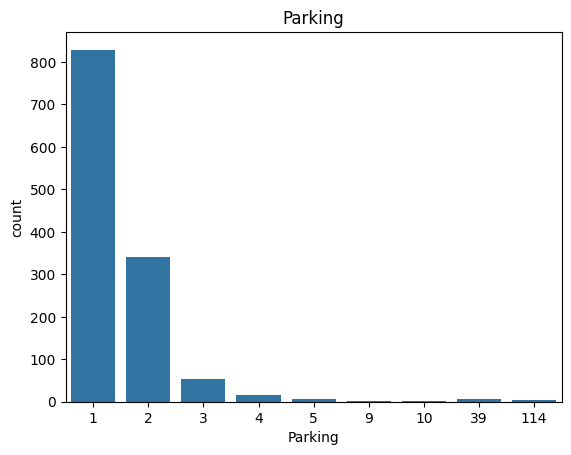

In [23]:
# Parking
sns.countplot(x=df['Parking'],data=df)
plt.title('Parking')

Majority of the houses in Delhi has one car parking which is quite common. Few of the houses have enough space for two car parking and very few houses have more than two car parking space.We can relate this graph to the graph with house area, where majority of the houses have area between 100 -200 sq.yards.

Text(0.5, 1.0, 'Status of the Property')

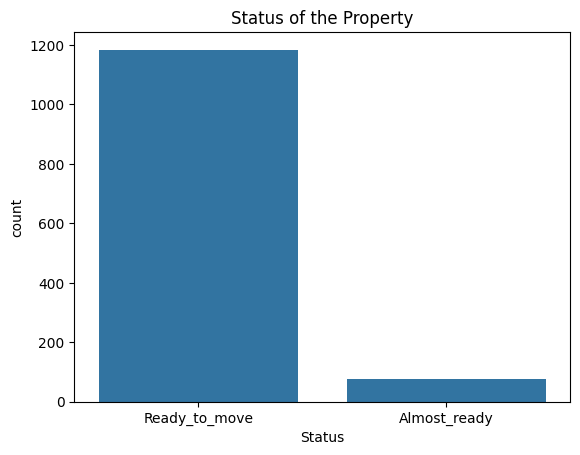

In [24]:
# Status
sns.countplot(x=df['Status'],data=df)
plt.title('Status of the Property')

Most of the houses are ready to move and actively looking for buyers. Very few houses are still under construction and would be ready to move soon.

Text(0.5, 1.0, 'Transaction Type')

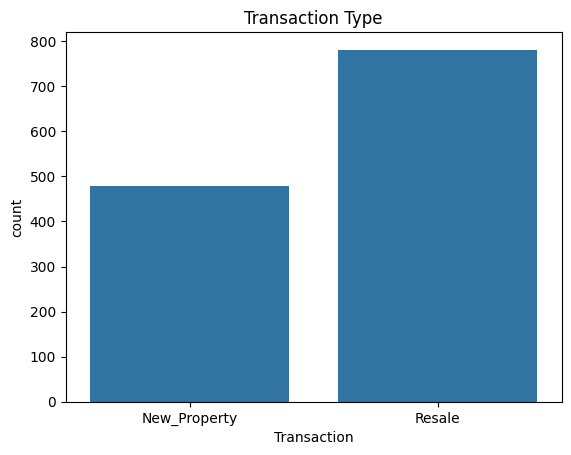

In [25]:
# Transaction Type
sns.countplot(x=df['Transaction'],data=df)
plt.title('Transaction Type')

A huge number of houses are resale type, which means a lot of people are moving out of Delhi. This could be due to the high pollution levels or some other reason.

Text(0.5, 1.0, 'Type of House')

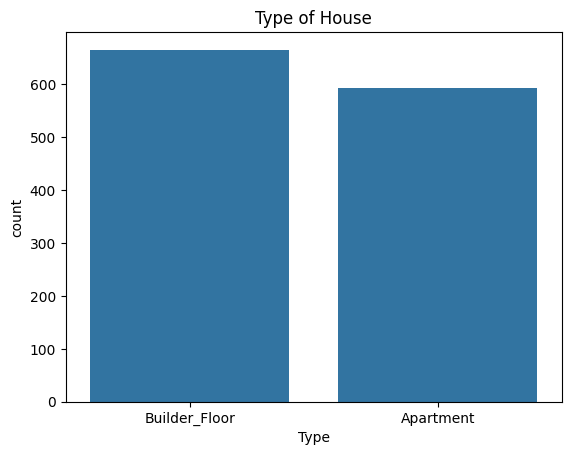

In [26]:
# House Type
sns.countplot(x=df['Type'],data=df)
plt.title('Type of House')

Most of the houses are builder floor which means people like to live in independent houses rather than apartments, due to the privacy and space they get in independent houses.

##### Relationship between features and target

Text(0.5, 1.0, 'Area vs Price')

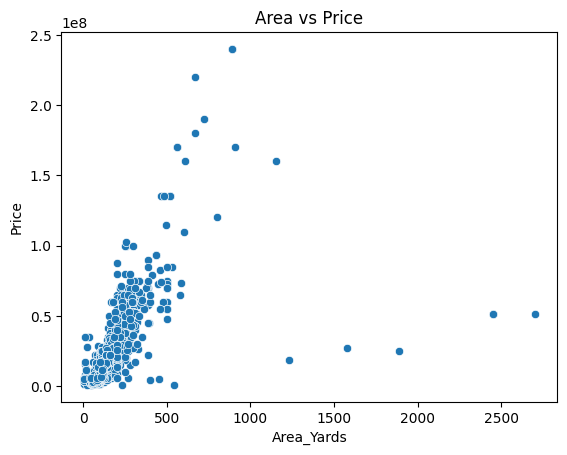

In [27]:
# Area and Price
sns.scatterplot(x ='Area_Yards', y ='Price',data = df)
plt.title('Area vs Price')

The scatterplot graph has trend of increase in price with increase in area, which is obvious. However, there are some houses whose price is lower as compared to other with similar area, which means there are several other factors which affects price of the house.

Text(0.5, 1.0, 'BHK vs Price')

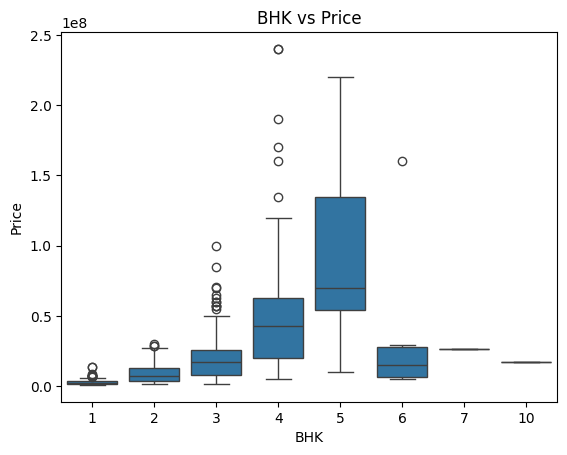

In [28]:
# BHK and Price
sns.boxplot(x ='BHK', y ='Price',data = df)
plt.title('BHK vs Price')

From this boxplot, we get to know about the price of the house increases with the increase in the BHK count.

Text(0.5, 1.0, 'Bathroom vs Price')

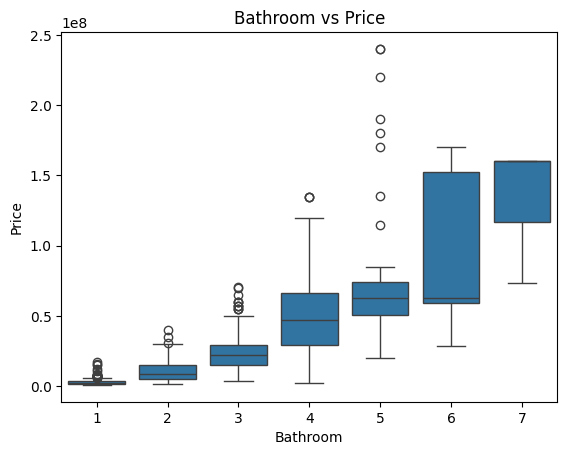

In [29]:
# Bathroom count and Price
sns.boxplot(x ='Bathroom', y ='Price',data = df)
plt.title('Bathroom vs Price')

Here the price of the house increases with increase in the number of bathrooms. Moreover the each bathroom count has similar house price as the previous graph for BHK and Price. Therefore, we can say that number of bathrooms and the BHK of the house are highly correlated.

Text(0.5, 1.0, 'Parking vs Price')

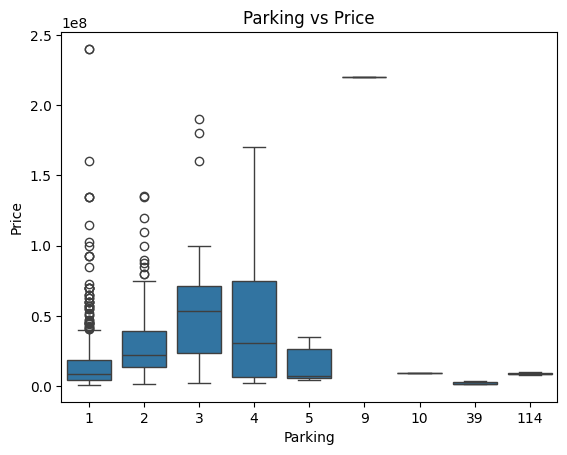

In [30]:
# Parking and Price
sns.boxplot(x ='Parking', y ='Price',data = df)
plt.title('Parking vs Price')

From this graph, we can assume that people usually look for the houses to have sufficient parking space, which means they don't want more than enough space for parking which evident throught the lower median price of houses with 4 parking space or more.

Text(0.5, 1.0, 'Locality vs Price')

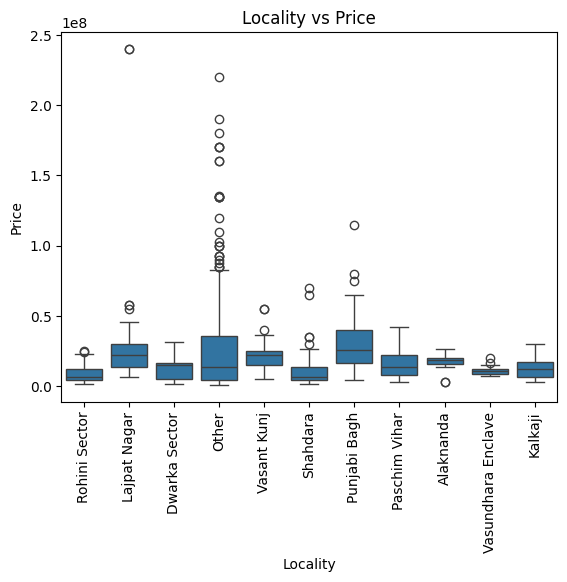

In [31]:
# Locality and Price
sns.boxplot(x ='Locality', y ='Price',data = df)
plt.xticks(rotation=90)
plt.title('Locality vs Price')

From this graph, we can get idea about the localities along with the house price. Punjabi Bagh locality has the highest median price,which means this is a posh locality.Punjabi Bagh is followed by Lagpat Nagar and Vasant Kunj. These two localities can be included in the posh locality.The localities with lowest median prices includes - Rohini Sector, Vasundhara Enclave and Shahdara and the rest of the localities are average.

Text(0.5, 1.0, 'Furnishing vs Price')

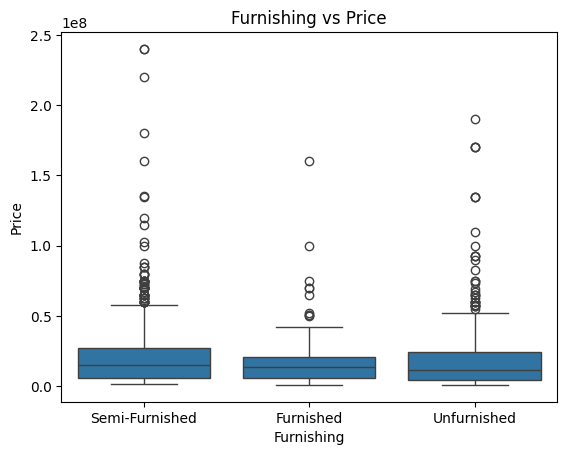

In [32]:
# Furnishing and Price
sns.boxplot(x ='Furnishing', y ='Price',data = df)
plt.title('Furnishing vs Price')

There is very little difference in the median house price based on the furnishing status. Interestingly, the furnished houses have a lower median price than the semi-furnished houses. The unfurnished houses have the lowest median price.

Text(0.5, 1.0, 'Status vs Price')

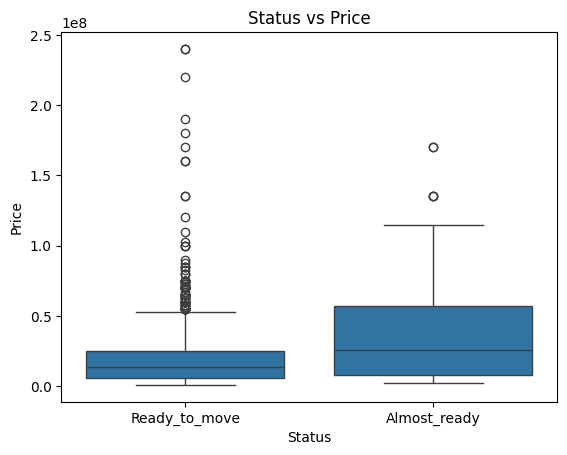

In [33]:
# Status and Price
sns.boxplot(x ='Status', y ='Price',data = df)
plt.title('Status vs Price')

Surprisingly the houses that are still under construction have higher median price than those which are ready to move in. This might be because the houses that are still under construction allow the buyers to make changes to interior/exterior.

Text(0.5, 1.0, 'Transaction vs Price')

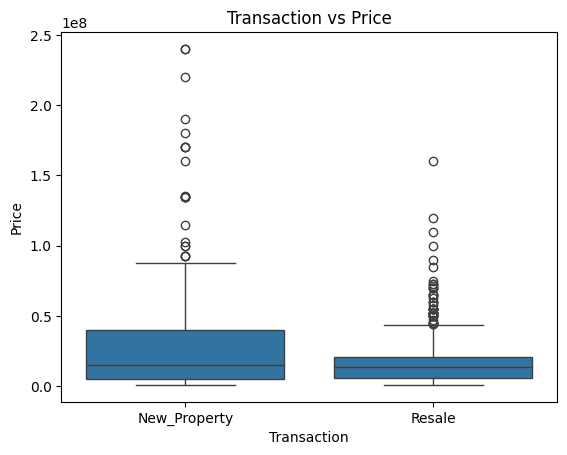

In [34]:
# Transaction Type and Price
sns.boxplot(x ='Transaction', y ='Price',data = df)
plt.title('Transaction vs Price')

As expected the new properties have higher price than old ones/ resale ones. The new properties attracts more buyers.

Text(0.5, 1.0, 'Type vs Price')

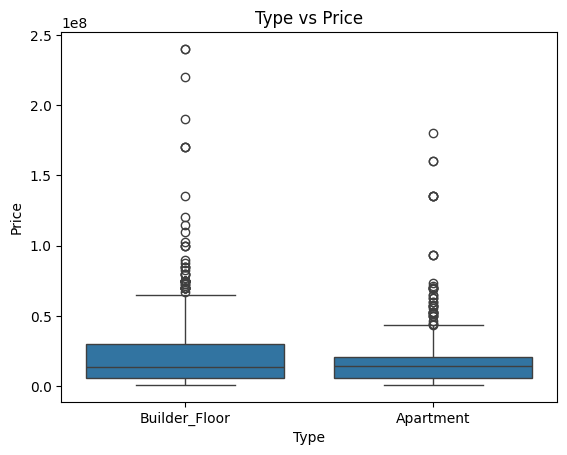

In [35]:
# Property and Price
sns.boxplot(x ='Type', y ='Price',data = df)
plt.title('Type vs Price')

Both the Builder Floor and Apartment type houses have nealry same median price with Apartment type houses having slightly higher median price. However, the builder floor type houses are more in number which means people are more interested in buying builder floor type houses.

<Axes: >

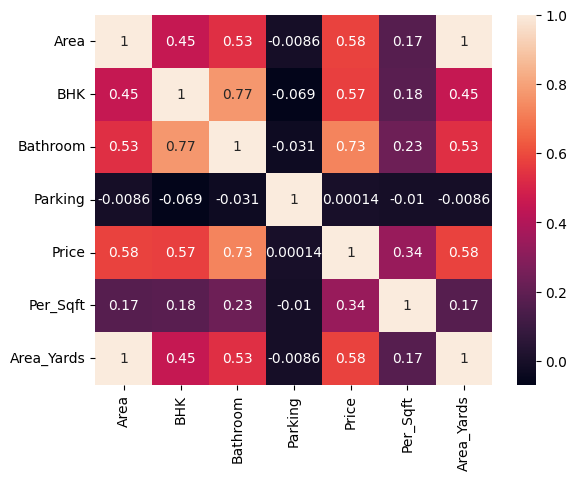

In [36]:
# Correlation Heatmap
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In this correlation matrix heatmap, we can see that the price of the house has high positive coorelation with land area, BHK, bathroom count, which proves are previous obersevation about their relation.

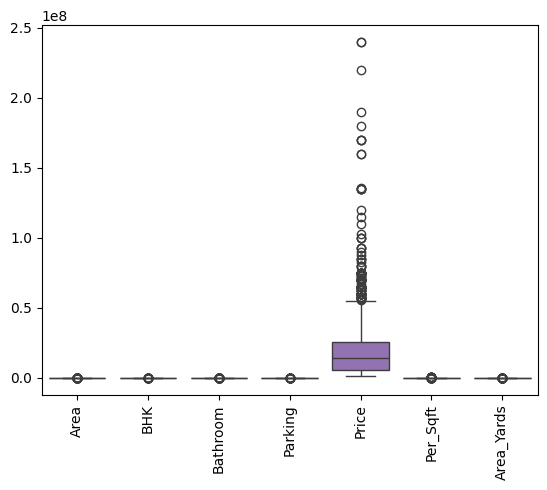

In [37]:
# Check for Outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing

#### Encoding categorical data

In [38]:
# Label Encoding
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  6  5  0 10  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


#### Handling Outliers

In [39]:
# Using Z - score to remove outliers
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [40]:
# Dropping Per_Sqft column
df = df.drop(['Per_Sqft'],axis=1)

In [41]:
# Normalizing the continuous features
scaler = MinMaxScaler()
df[['Area','Price','Area_Yards']] = scaler.fit_transform(df[['Area','Price','Area_Yards']])

In [42]:
# Feature and Target Separation
X = df.drop('Price',axis=1)
y = df.Price

In [43]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
X_train.shape

(898, 10)

In [45]:
X_test.shape

(225, 10)

### Model Training
I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

#### Decision Tree Regressor

In [46]:
# Define the model
dtree = DecisionTreeRegressor()

##### Hypertuning the model with GridSearchCV

In [47]:
# Defining parameters
parameters  = {
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt']
}

In [48]:
# Creating GridSearchCV object
grid_search = GridSearchCV(dtree, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8}


In [55]:
dtree_model = DecisionTreeRegressor( max_depth=6, max_features='sqrt', min_samples_leaf = 4, min_samples_split = 8)

In [56]:
# Training the model
dtree_model.fit(X_train, y_train)

# Training Accuracy
dtree_model.score(X_train, y_train)

0.8138904373924281

#### Evaluating Decision Tree Regressor Model

In [57]:
# Predicting the house price
dtree_pred = dtree_model.predict(X_test)

In [58]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': dtree_pred})
df1.reset_index(drop=True, inplace=True)
df1.head(10)

,Actual,Predicted
0,0.078652,0.131621
1,0.134831,0.342921
2,0.455056,0.222600
3,0.131461,0.171869
4,0.157303,0.066807
5,0.035955,0.131621
6,0.410112,0.360955
7,0.207865,0.342921
8,0.028090,0.050990
9,0.230337,0.190482


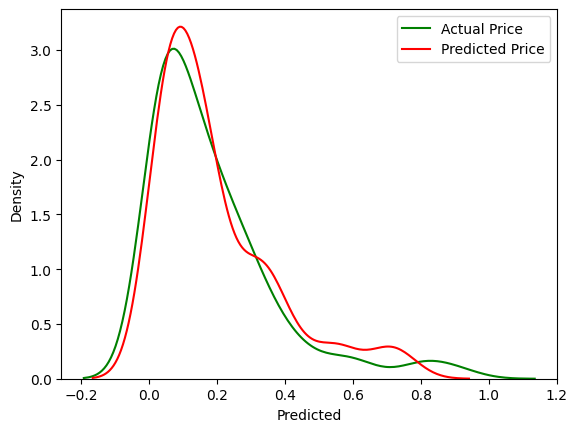

In [59]:
# KDE Plot
ax = sns.distplot(df1['Actual'], color = 'g', label = 'Actual Price', hist = False)
sns.distplot(df1['Predicted'], color = 'r', label = 'Predicted Price', ax=ax, hist = False)
plt.legend()

In [60]:
# Regression Metrics
print("R2 Score: ", r2_score(y_test, dtree_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, dtree_pred)))

R2 Score:  0.6888676430777212
Mean Squared Error:  0.010991642514259187
Mean Absolute Error:  0.06811520915856455
Root Mean Squared Error:  0.10484103449632298


#### Random Forest Regressor

In [63]:
# Define the model
rfr = RandomForestRegressor()

# Training the model
rfr.fit(X_train, y_train)


# Training Accuracy
rfr.score(X_train, y_train)

0.9624359841214312

#### Evaluating the Random Forest Regressor Model

In [64]:
# Predicting the house price
rf_pred = rfr.predict(X_test)

In [65]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
df2.reset_index(drop=True, inplace=True)
df2.head(10)

,Actual,Predicted
0,0.078652,0.096685
1,0.134831,0.435101
2,0.455056,0.263522
3,0.131461,0.127235
4,0.157303,0.076160
5,0.035955,0.090413
6,0.410112,0.345966
7,0.207865,0.325562
8,0.028090,0.052604
9,0.230337,0.214719


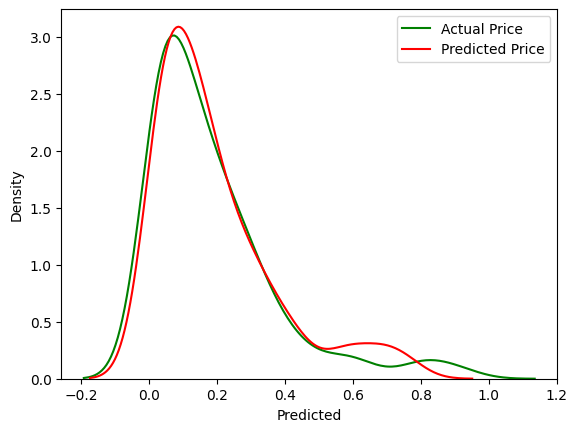

In [66]:
# KDE Plot
ax = sns.distplot(df2['Actual'], color = 'g', label = 'Actual Price', hist = False)
sns.distplot(df2['Predicted'], color = 'r', label = 'Predicted Price', ax=ax, hist = False)
plt.legend()

In [67]:
# Regression Metrics
print("R2 Score: ", r2_score(y_test, rf_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, rf_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 Score:  0.7352340186855881
Mean Squared Error:  0.009353617365075334
Mean Absolute Error:  0.05832934256782197
Root Mean Squared Error:  0.09671410116976394


From the above models,The Random Forest regressor performed better than the Decision Tree Regressor with an accuracy of 73.52%